# Scatter
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

band width : 1.8158484154517098
cluster labels 유형 :  [0 1 2]
cluster labels 유형 :  [0 1 2]
cluster labels 유형 :  [0 1 2]
cluster labels 유형 :  [0 1 2 3 4 5]
cluster labels 유형 :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]


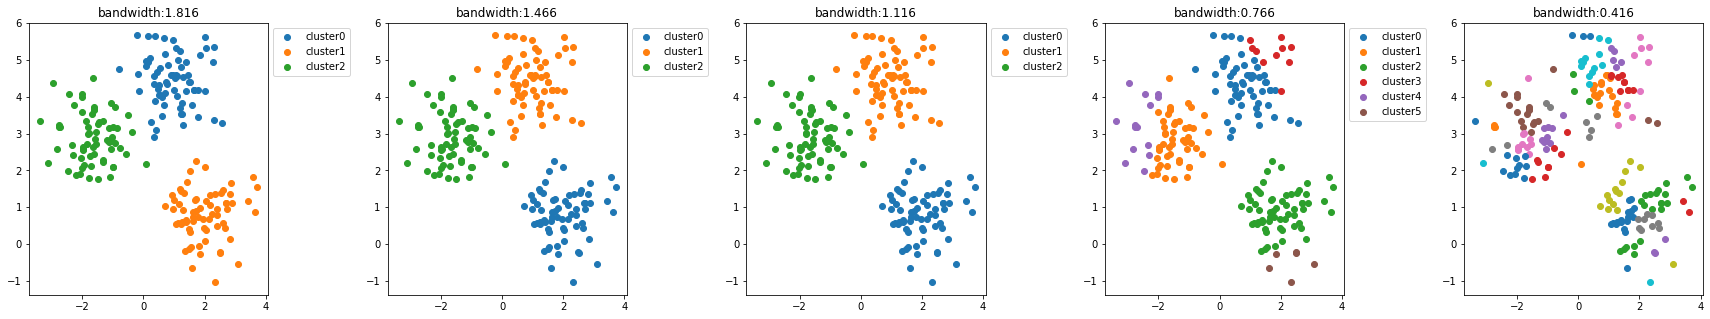

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift, estimate_bandwidth   
import matplotlib.pyplot as plt
X,y = make_blobs(n_samples=200, n_features=2, centers=3,cluster_std=0.7,random_state=0)

# 최적 bandwidth 계산
bandwidth=estimate_bandwidth(X)
print('band width :',bandwidth)

fig, axs = plt.subplots(figsize=(30,5),ncols=5)
fig.subplots_adjust(wspace=0.5)
for j in range(5):    
    # 평균이동 군집화
    meanshift = MeanShift(bandwidth=bandwidth)
    cluster_labels = meanshift.fit_predict(X)
    print('cluster labels 유형 : ',np.unique(cluster_labels))

    DF = pd.DataFrame(data=X)
    DF['cluster'] = cluster_labels
    clusters = np.unique(cluster_labels)
    for i , cluster in enumerate(clusters):
        axs[j].scatter(x=DF[DF['cluster']==i][0],y=DF[DF['cluster']==i][1], label='cluster'+str(i))
    axs[j].set_title('bandwidth:'+ str(np.round(bandwidth,3)))
    if len(clusters)<=6 :
        axs[j].legend(bbox_to_anchor=(1, 1))
    bandwidth -=0.35
# fig.savefig('Meanshift_plot.png')